## PHYS 105A:  Introduction to Scientific Computing

# Integration of ODEs

In this assignment, we will use the RK4 algorithm to solve the double pendulum problem.

## The Double Pendulum Problem

* The double pendulum is one of the most famous non-linear, chaotic problem.

* It is a pendulum with another pendulum attached to its end.

![Double pendulum](https://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg)

## The Double Pendulum Problem

* We assume that the two arms of the pendulums have the same length $l$.

* We assume that the mass of each arm is $m$.

* The angle between the first and second pendulums, with respect to the vertical axis, are denoted by $\theta_1$ and $\theta_2$.

* Newton's second law suggests that we will need to solve a system of two second-order ordinary differential equations (ODEs).

* Using the methods we learn in the lecture, we can cast the problem into a system of four first-order ODEs.

## Equation of Motion

* The equations of motion is non-trivial to derive so we will spell them out explicitly here:

  $\frac{d\theta_1}{dt} =
  \frac{6}{m l^2}\frac{2 p_1 - 3 \cos(\theta_1 - \theta_2) p_2}{16 - 9 \cos^2(\theta_1 - \theta_2)}$
  
  $\frac{d\theta_2}{dt} =
  \frac{6}{m l^2}\frac{8 p_2 - 3 \cos(\theta_1 - \theta_2) p_1}{16 - 9 \cos^2(\theta_1 - \theta_2)}$
  
  $\frac{dp_1}{dt} =
  -\frac{1}{2} m l^2 \left(\frac{d\theta_1}{dt} \frac{d\theta_2}{dt}\sin(\theta_1 - \theta_2) +
                           3\frac{g}{l}\sin\theta_1\right)$
                      
  $\frac{dp_2}{dt} =
  -\frac{1}{2} m l^2 \left(-\frac{d\theta_1}{dt} \frac{d\theta_2}{dt}\sin(\theta_1 - \theta_2) +
                            \frac{g}{l}\sin\theta_2\right)$
                           
  where $p_1$ and $p_2$ are called the generalized momenta.  (There might be typos in the equation.  Please [double check](https://en.wikipedia.org/wiki/Double_pendulum).)
  
* We cannot solve these equations by hand.  Let's solve them with the RK4 method.

In [12]:
# Step 1. Import Libraries

import numpy as np
from matplotlib import pyplot as plt

In [13]:
# Step 2. Copy and paste the RK4 method we implemented in the lecture here

def RK4(f, x, t, dt, n):
    T = np.array(t)
    X = np.array(x)
    
    for i in range(n):
        k1 = dt * np.array(f(*(x         )))
        k2 = dt * np.array(f(*(x + 0.5*k1)))
        k3 = dt * np.array(f(*(x + 0.5*k2)))
        k4 = dt * np.array(f(*(x +     k3)))
        
        t += dt
        x += k1/6 + k2/3 + k3/3 + k4/6
        
        T = np.append( T, t)
        X = np.vstack((X, x))
    return T, X

In [14]:
# Step 3. Start implemented the system of four first-order ODEs 

def f(th1, th2, p1, p2):
    m  = 1
    l  = 1
    g  = 1
    
    u1 = m * l * l
    u2 = g / l
    
    dth1 = 6 / u1 * (2 * p1 - 3 * np.cos(th1 - th2) * p2) / (16 - 9 * np.cos(th1 - th2) * np.cos(th1 - th2))
    dth2 = 6 / u1 * (8 * p2 - 3 * np.cos(th1 - th2) * p1) / (16 - 9 * np.cos(th1 - th2) * np.cos(th1 - th2))
    
    dp1  = - 0.5 * u1 * (  dth1 * dth2 * np.sin(th1 - th2) + 3 * u2 * np.sin(th1))
    dp2  = - 0.5 * u1 * (- dth1 * dth2 * np.sin(th1 - th2) +     u2 * np.sin(th2))
    
    return dth1, dth2, dp1, dp2

In [39]:
# Step 4. Use RK4 to solve for the ODEs
#
# Let use the initial condition such that the pudendums start on the right horizontally.

N = 1000

T, X = RK4(f, (np.pi/4, np.pi/2, 0.3, 0.4), 0, 100/N, N) 

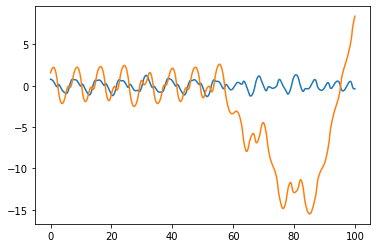

In [40]:
# Step 5. Plot the results

plt.plot(T, X[:,0])
plt.plot(T, X[:,1])

In [41]:
%%capture

# Step 6. Improve the visualization

from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(8,8))
ax  = plt.axes(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    th1 = X[i,0]
    th2 = X[i,1]
    
    x1 =   np.sin(th1)
    y1 = - np.cos(th1)
    
    x2 =   np.sin(th2)
    y2 = - np.cos(th2)
    
    line.set_data([0, x1, x1+x2], [0, y1, y1+y2])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=True)

In [42]:
# Step7. Look at the movie

HTML(anim.to_html5_video())

In [43]:
# Step 8. Save the movie

anim.save('double_pendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

## Question

This is last assignment for this semester.  And it extremely exciting that we are now able to solve the motion of a chaotic system.

Try changing the initial conditions slightly and save your movies with different names, what do you see?

Does the result change when you change the step size?  Why?

Please place your answer in the following cell.

#I see that slight changes in intitial conditions can lead to drastically different evolutions of the system.

When changing the step size a smaller step results in a smoother animation. This is because the states of the system are closer together and thus there is a smoother transition between them.